<a href="https://colab.research.google.com/github/Vindya-gangotri05/DST-Project/blob/main/BRAIN_CANCER_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


In [3]:
df = pd.read_csv("/content/BrainCancer.csv")

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 sex          0
diagnosis    1
loc          0
ki           0
gtv          0
stereo       0
status       0
time         0
dtype: int64


In [6]:
df['diagnosis'].fillna(df['diagnosis'].mode()[0], inplace=True)

/tmp/ipython-input-2994822628.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['diagnosis'].fillna(df['diagnosis'].mode()[0], inplace=True)


In [7]:
for col in ['sex', 'diagnosis', 'loc', 'stereo']:
    df[col] = LabelEncoder().fit_transform(df[col])

In [8]:
X = df.drop('status', axis=1)
y = df['status']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

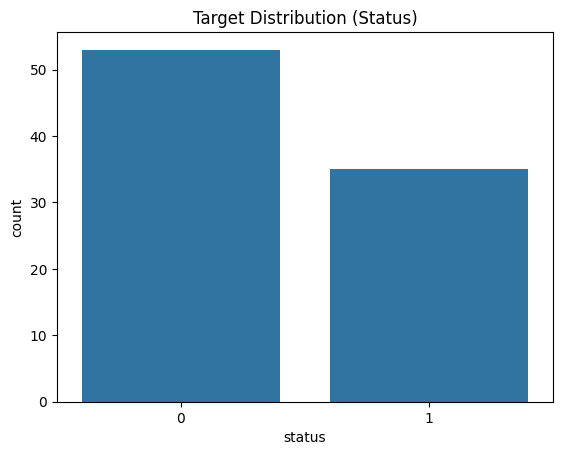

In [10]:
sns.countplot(x=y)
plt.title("Target Distribution (Status)")
plt.show()

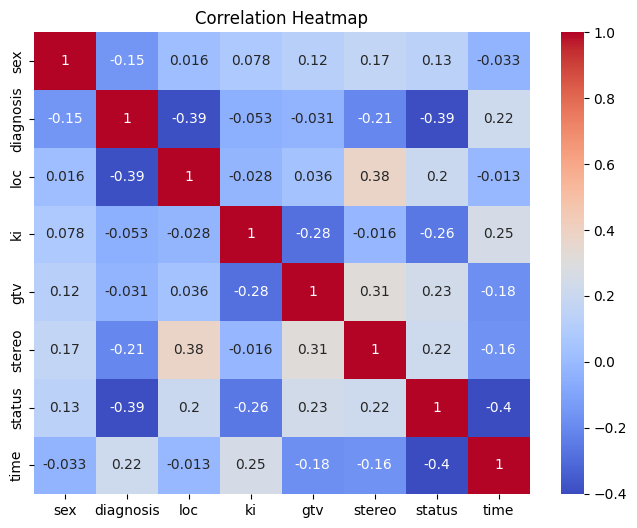

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [12]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [13]:
y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:,1]

In [14]:
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.80      0.67      0.73         6

    accuracy                           0.83        18
   macro avg       0.82      0.79      0.80        18
weighted avg       0.83      0.83      0.83        18



In [15]:
print("Logistic Regression ROC-AUC:", roc_auc_score(y_test, y_prob_log))

Logistic Regression ROC-AUC: 0.9444444444444444


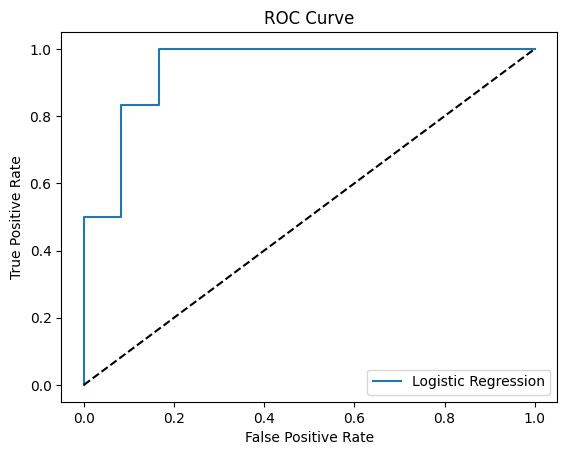

In [16]:
fpr, tpr, _ = roc_curve(y_test, y_prob_log)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [17]:
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [18]:
y_pred_tree = tree.predict(X_test)
y_prob_tree = tree.predict_proba(X_test)[:,1]

In [19]:
print("Decision Tree Report:")
print(classification_report(y_test, y_pred_tree))
print("Decision Tree ROC-AUC:", roc_auc_score(y_test, y_prob_tree))

Decision Tree Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.83      0.91         6

    accuracy                           0.94        18
   macro avg       0.96      0.92      0.93        18
weighted avg       0.95      0.94      0.94        18

Decision Tree ROC-AUC: 0.8750000000000001


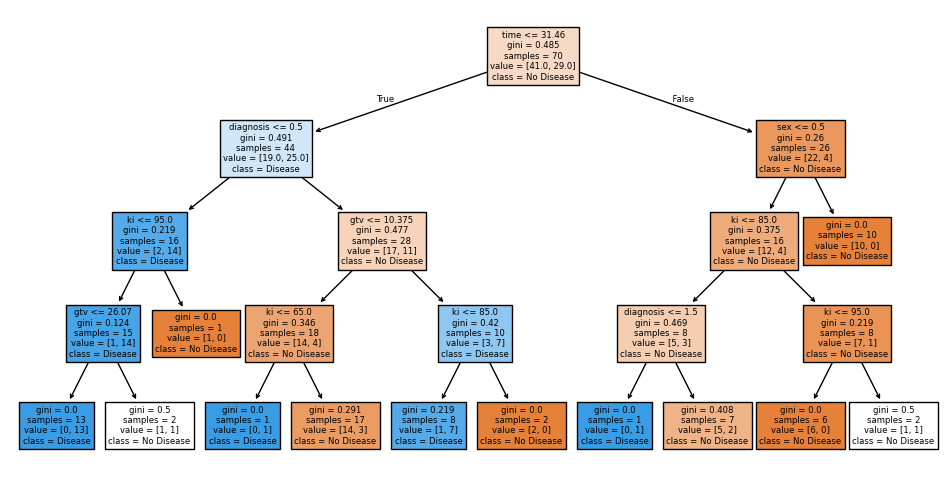

In [20]:
plt.figure(figsize=(12,6))
plot_tree(tree, feature_names=X.columns, class_names=['No Disease','Disease'], filled=True)
plt.show()

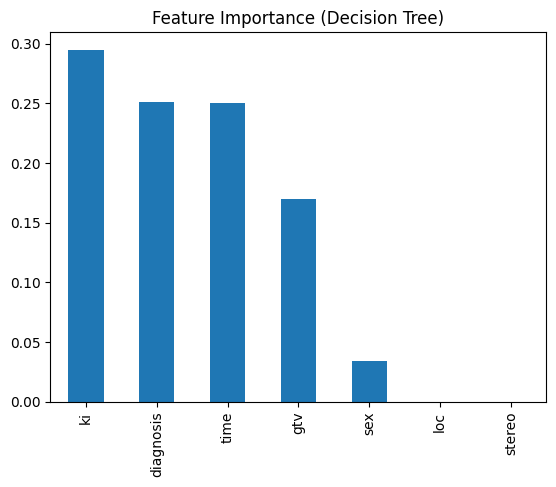

In [21]:
importance = pd.Series(tree.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance (Decision Tree)')
plt.show()

In [22]:
params = {'max_depth':[2,3,4,5], 'min_samples_split':[2,4,6,8]}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), params, scoring='f1', cv=3)
grid.fit(X_train, y_train)
print("Best Parameters for Decision Tree:", grid.best_params_)

Best Parameters for Decision Tree: {'max_depth': 3, 'min_samples_split': 2}


In [24]:
from sklearn.metrics import accuracy_score

accuracy_log = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Accuracy:", accuracy_log)

Logistic Regression Accuracy: 0.8333333333333334


In [25]:
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Accuracy:", accuracy_tree)

Decision Tree Accuracy: 0.9444444444444444
